In [2]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np 
import missingno as msno
import matplotlib.pyplot as plt

In [4]:
launches = pd.read_csv("spacex_launch_data.csv")

In [5]:
launches.head()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Mission Outcome,Landing Outcome
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,NaN,LEO,SpaceX,Success,Failure (parachute)
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",NaN,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525,LEO (ISS),NASA (COTS),Success,No attempt
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


In [6]:
launches.tail()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Mission Outcome,Landing Outcome
52,52,2018-04-02,20:30:00,F9 B4 B1039.2,CCAFS SLC-40,SpaceX CRS-14,"2,647",LEO (ISS),NASA (CRS),Success,No attempt
53,53,2018-04-18,22:51:00,F9 B4 B1045.1,CCAFS SLC-40,Transiting Exoplanet Survey Satellite (TESS),362,HEO,NASA (LSP),Success,Success (drone ship)
54,54,2018-05-11,20:14:00,F9 B5 B1046.1,KSC LC-39A,Bangabandhu-1,"3,600",GTO,Thales-Alenia/BTRC,Success,Success (drone ship)
55,55,2018-05-22,19:47:58,F9 B4 B1043.2,VAFB SLC-4E,"Iridium NEXT 6 GRACE-FO 1, 2","6,460",Polar LEO,Iridium Communications GFZ • NASA,Success,No attempt
56,56,2018-06-04,4:45:00,F9 B4 B1040.2,CCAFS SLC-40,SES-12,"5,384",GTO,SES,Success,No attempt


In [7]:
launches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Flight Number      57 non-null     object
 1   Date               57 non-null     object
 2   Time (UTC)         57 non-null     object
 3   Booster Version    57 non-null     object
 4   Launch Site        57 non-null     object
 5   Payload            57 non-null     object
 6   Payload Mass (kg)  55 non-null     object
 7   Orbit              57 non-null     object
 8   Customer           57 non-null     object
 9   Mission Outcome    57 non-null     object
 10  Landing Outcome    57 non-null     object
dtypes: object(11)
memory usage: 5.0+ KB


In [8]:
launches.shape

(57, 11)

In [9]:
launches.columns.values.tolist()

['Flight Number',
 'Date',
 'Time (UTC)',
 'Booster Version',
 'Launch Site',
 'Payload',
 'Payload Mass (kg)',
 'Orbit',
 'Customer',
 'Mission Outcome',
 'Landing Outcome']

In [10]:
launches.dtypes

Flight Number        object
Date                 object
Time (UTC)           object
Booster Version      object
Launch Site          object
Payload              object
Payload Mass (kg)    object
Orbit                object
Customer             object
Mission Outcome      object
Landing Outcome      object
dtype: object

In [11]:
launches.isnull().any().any()

True

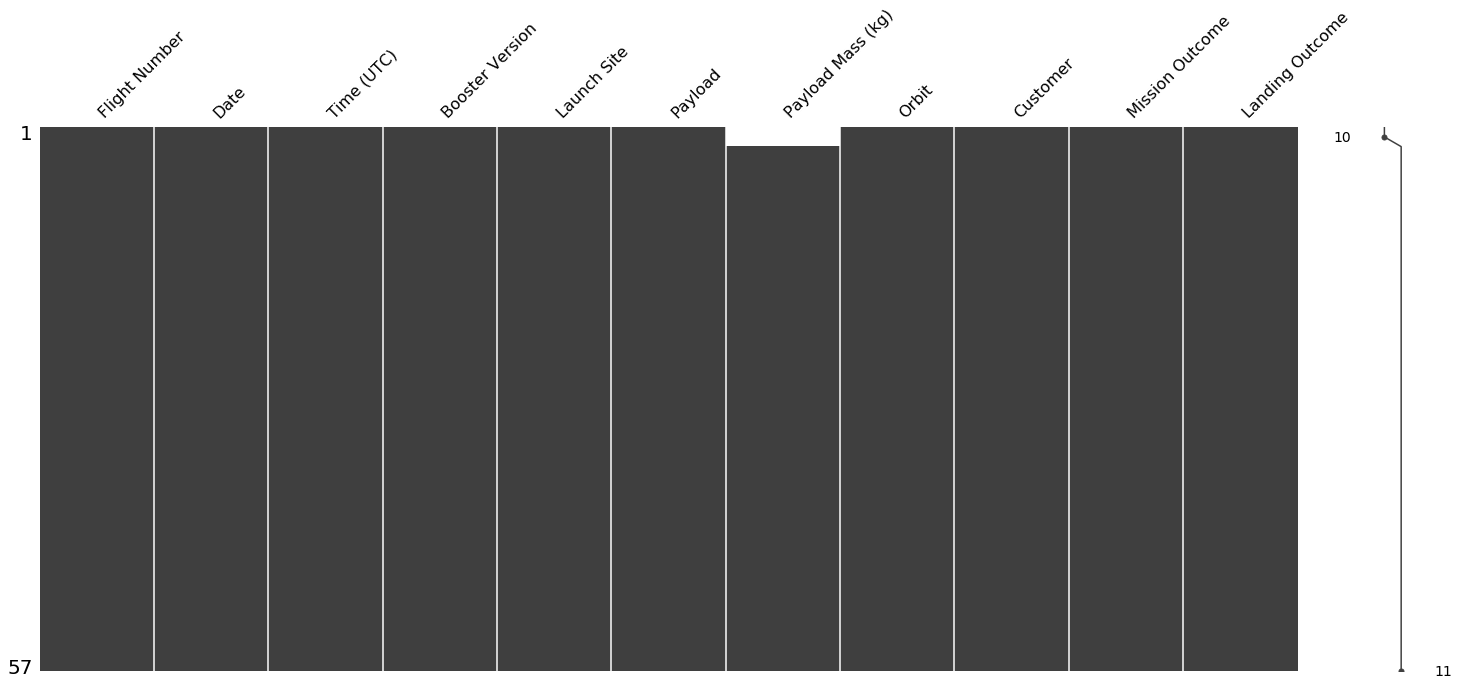

In [12]:
msno.matrix(launches)

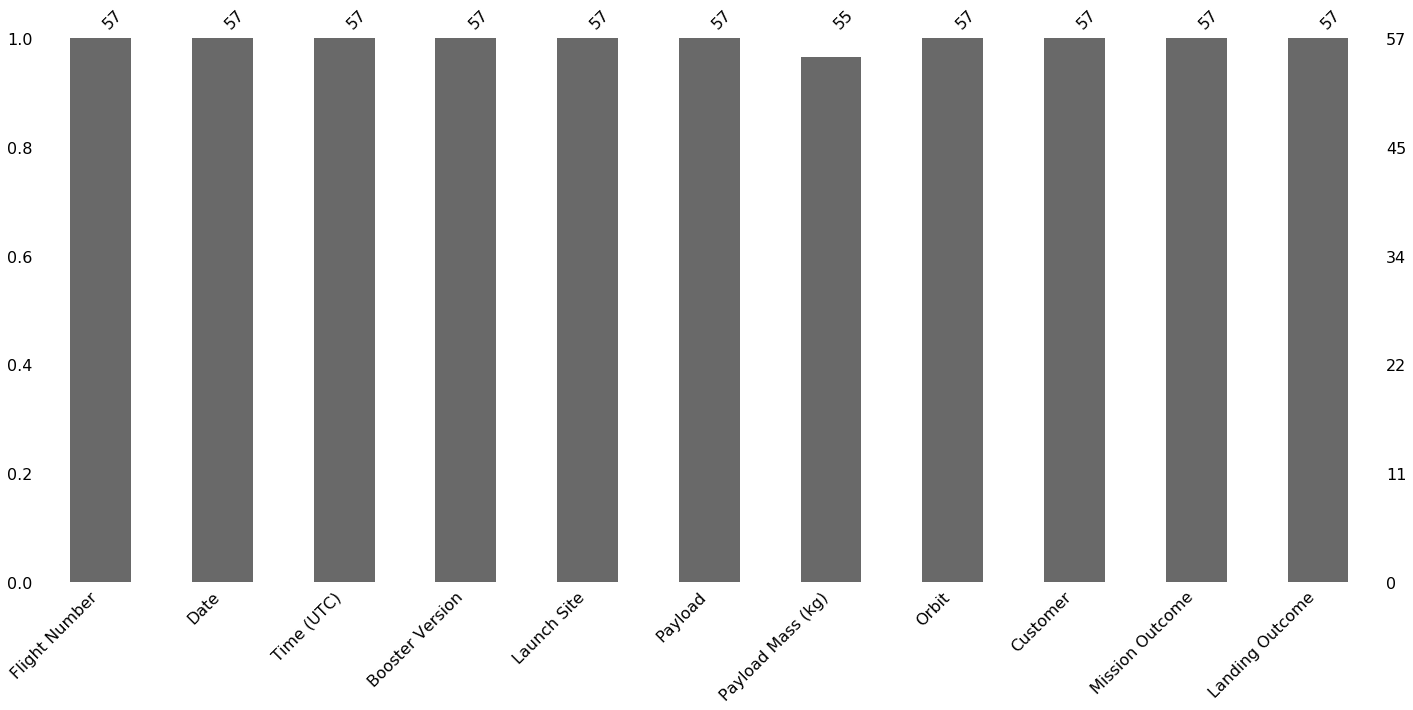

In [13]:
msno.bar(launches)

In [14]:
launches.columns[launches.isnull().any()].tolist()

['Payload Mass (kg)']

In [15]:
launches.describe()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Mission Outcome,Landing Outcome
count,57,57,57,57,57,57,55,57,57,57,57
unique,57,57,55,53,4,57,48,8,30,3,12
top,37,2017-02-19,23:03:00,F9 v1.1,CCAFS LC-40,SpaceX CRS-2,"9,600",GTO,NASA (CRS),Success,No attempt
freq,1,1,2,5,26,1,5,22,14,55,18


In [16]:
launches.agg(['count','size','nunique'])

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Mission Outcome,Landing Outcome
count,57,57,57,57,57,57,55,57,57,57,57
size,57,57,57,57,57,57,57,57,57,57,57
nunique,57,57,55,53,4,57,48,8,30,3,12


In [17]:
launches_copy = launches.copy()

In [60]:
platforms = list(launches['Launch Site'].unique())
values = range(1,5)
mapping = dict(zip(platforms,values))
mapping

{'CCAFS LC-40': 1, 'VAFB SLC-4E': 2, 'KSC LC-39A': 3, 'CCAFS SLC-40': 4}

In [61]:
launches_copy['Launch Sites'] = launches['Launch Site'].map(mapping)

In [62]:
events = list(launches['Mission Outcome'].unique())
vals = (1,0,0.5)
pair = dict(zip(events,vals))
pair

{'Success': 1,
 'Failure  (in flight)': 0,
 'Success  (payload\xa0status unclear)': 0.5}

In [63]:
launches_copy['Mission Outcome Rate']=launches['Mission Outcome'].map(pair)
launches_copy.head()


,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Mission Outcome,Landing Outcome,Mission Outcome Rate,Launch Sites
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,NaN,LEO,SpaceX,Success,Failure (parachute),1.0,1
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",NaN,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute),1.0,1
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525,LEO (ISS),NASA (COTS),Success,No attempt,1.0,1
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt,1.0,1
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt,1.0,1


In [72]:
lands = list(launches['Landing Outcome'].unique())
lands
valor = (0,0,0.2,0.5,0,0,1,1,1,1)
mapeo = dict(zip(lands,valor))
mapeo

{'Failure   (parachute)': 0,
 'No attempt': 0,
 'Uncontrolled (ocean)': 0.2,
 'Controlled (ocean)': 0.5,
 'Failure  (drone ship)': 0,
 'Precluded  (drone ship)': 0,
 'Success  (ground pad)': 1,
 'Failure (drone ship)': 1,
 'Success  (drone ship)': 1,
 'Success (drone ship)': 1}

In [73]:
launches_copy['Landing Outcome Rate'] = launches['Landing Outcome'].map(mapeo)

In [47]:
launches_copy['Mission Outcome Rate'].mean()

0.9736842105263158

In [74]:
launches_copy.groupby(["Launch Sites"])[["Mission Outcome Rate","Landing Outcome Rate"]].sum()

,Mission Outcome Rate,Landing Outcome Rate
Launch Sites,,
1,25.0,7.7
2,10.0,5.7
3,14.0,5.0
4,6.5,1.5


In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

Text(0.5, 1.0, 'Frequency of Mission Outcome Rate')

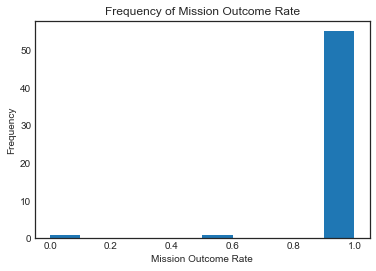

In [76]:
plt.hist(launches_copy['Mission Outcome Rate'])
plt.xlabel('Mission Outcome Rate')
plt.ylabel('Frequency')
plt.title('Frequency of Mission Outcome Rate')

/Users/mafernuez/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mafernuez/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Frequency of Landing Outcome Rate')

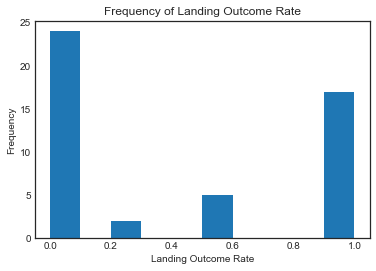

In [77]:
plt.hist(launches_copy['Landing Outcome Rate'])
plt.xlabel('Landing Outcome Rate')
plt.ylabel('Frequency')
plt.title('Frequency of Landing Outcome Rate')